# A Sample of Evaluating a Trained Model

## Import some necessary modules

In [1]:
import torch
import numpy as np
import argparse
import matplotlib.pyplot as plt
from main import model_prepare, cluster_tsp_solver
from visualisation import plot_the_clustering_2d_with_cycle, plot_task_points

2025-05-20 18:00:03.190129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/masong/sitl_gz/wave_ws/install/lib
2025-05-20 18:00:03.190147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load some arguments

In [2]:
args = argparse.Namespace()
args.model_type = 'moe_mlp'
args.clusters_num = 3
args.n_component = 3
args.city_num = 15
args.feature_dim = 2
args.hidden_dim = 128
args.train = False
args.eval = True

First, we need two principe inputs for this evaluation procedure: the trained model and the evaluation sample.

We'll start with the trained model. you may feel free to try your own trained model by replacing the below directory to the one of your model.

In [3]:
args.eval_dir = 'trained_sessions/moe_mlp/rand_50-3/trained_model/batch30400.pt'
model = model_prepare(args)

/home/masong/codes/rl_waypoint_mrta/main.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(args.eval_dir, map_location=torch.device('cpu'

## Data loader and auxiliaries with background

After loaded the model to evaluate, we'll move on to the data.

### Generate the data

Data can either be generated randomly as follows:

In [ ]:
x = torch.rand([1, 100, 2])

### Import the data

or it can be imported from a file:

In [4]:
x = np.load('enu_array.npy')
x = np.expand_dims(x, 0)
x = torch.from_numpy(x)

Let's see what is the data like with data visualisation

FileNotFoundError: [Errno 2] No such file or directory: 'fig/task_showcaseTue May 20 18:01:08 2025.eps'

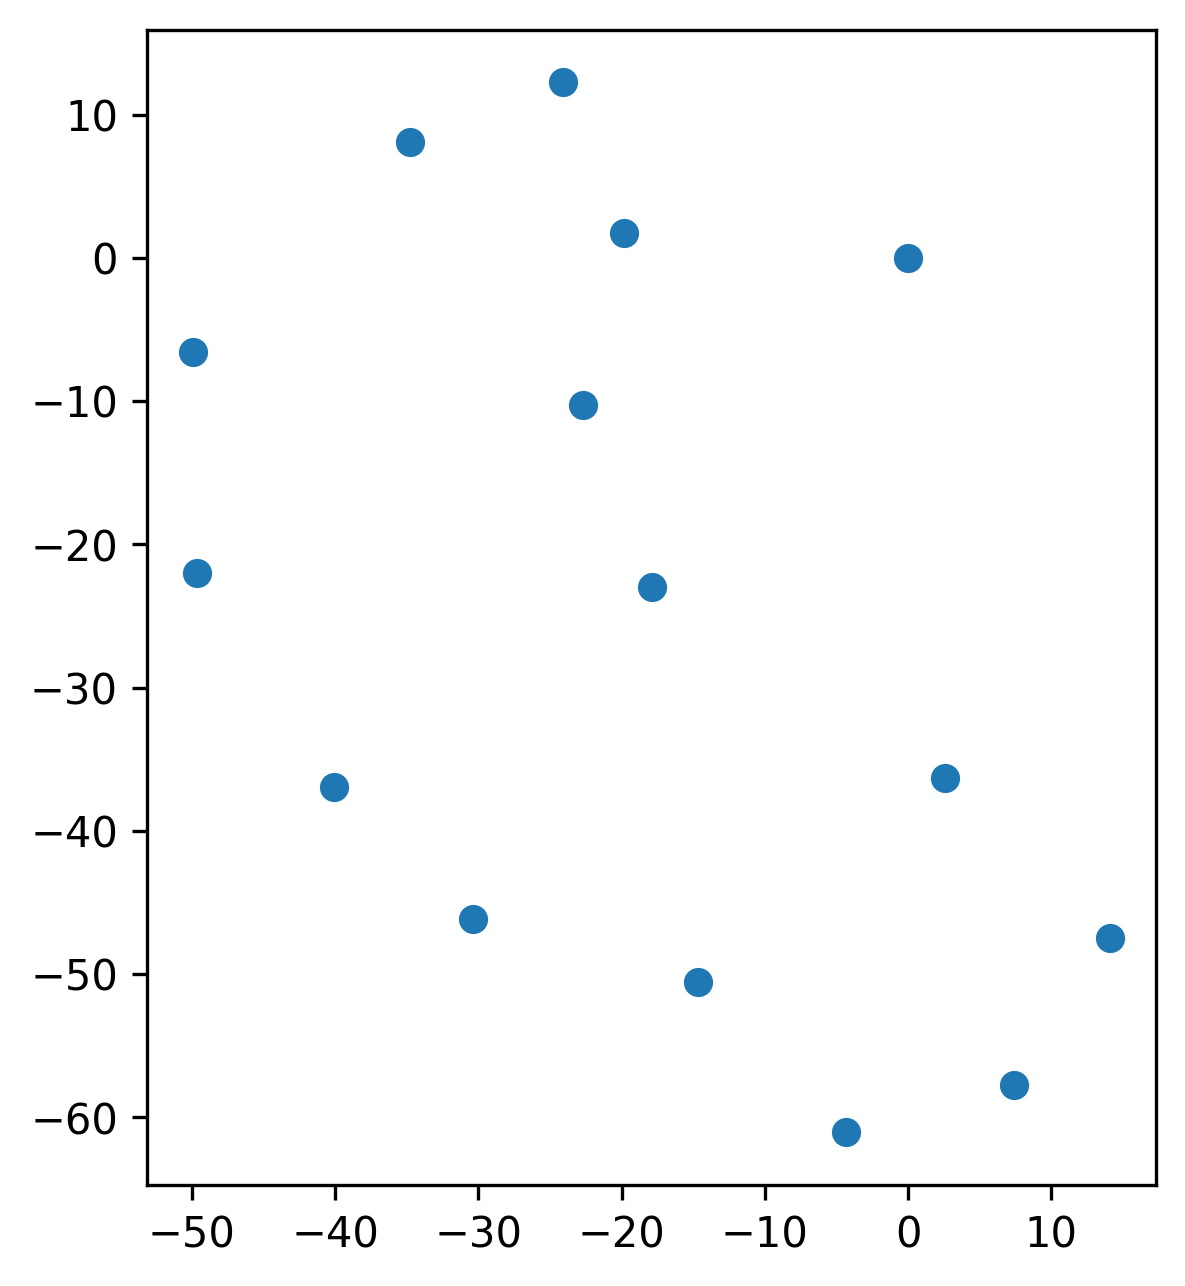

In [5]:
plot_task_points(x[0], showcase_mode='save', save_path='fig/')

The imported data needs normalisation

In [6]:
x = x.to(torch.float32)
x_norm = (x - x.min()) / (x.max() - x.min())

In [7]:
a, logits, log_sample = model(x_norm)

pi, c_d, c_d_origin, degeneration_flag = cluster_tsp_solver(args.clusters_num, m=0, a=a, x=x_norm, degeneration_penalty=10.0)


/home/masong/codes/rl_waypoint_mrta/attention2route_utils/functions.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(load_path, map_location=lambda sto

In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi=pi, background=plt.imread('./tmp/Northsea plt.png'))

In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi=pi, background=plt.imread('./tmp/Northsea plt.png'), showcase_mode='save',save_path='/Users/masong')

In [10]:
sum(c_d), sum(c_d_origin), degeneration_flag

(4.633028626441956, 4.633028626441956, None)

In [11]:
max(c_d), max(c_d_origin), degeneration_flag

(2.7246761, 2.7246761, None)

In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], draw_cycle=True, pi=pi, showcase_mode='save', save_path='/Users/masong')

In [ ]:
np.save('/home/masong/Desktop/x.npy', x.numpy())

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], 'save', save_path='/home/masong')


## Data loader and auxiliaries without background

After loaded the model to evaluate, we'll move on to the data.

In [ ]:
x = torch.rand([1, 100, 2])
np.save(open('/Users/masong/taskData.npy', 'wb'), x.numpy())

### Import the data

or it can be imported from a file:

In [ ]:
x = np.load('./tmp/platforms.npy')
x = np.expand_dims(x, 0)
x = torch.from_numpy(x)

Let's see what is the data like with data visualisation

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plt.scatter(x[0, :, 0], x[0, :, 1])
plt.savefig('//Users/masong/taskpoints.eps', format='eps')

In [ ]:
a, logits, log_sample = model(x)

pi, c_d, c_d_origin, degeneration_flag = cluster_tsp_solver(args.clusters_num, m=0, a=a, x=x, degeneration_penalty=10.0)


In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi, showcase_mode='show')
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi, showcase_mode='save', save_path='/Users/masong')

In [ ]:
c_ds = c_d_origin + [max(c_d_origin), sum(c_d_origin)]
f = open('/Users/masong/distances.txt', 'w')
for dist in c_ds:
    f.write(f"{dist}\n")
f.close()

In [ ]:
c_d_origin


In [ ]:
sum(c_d), sum(c_d_origin), degeneration_flag

In [ ]:
max(c_d), max(c_d_origin), degeneration_flag

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], 'save', save_path='/Users/masong')
